In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

veri = pd.read_excel('https://www.dropbox.com/s/luoopt5biecb04g/SATILIK_EV1.xlsx?dl=1')
veri.head()

,Unnamed: 0,Fiyat,Oda_Sayısı,Net_m2,Katı,Yaşı
0,0,475,1,40,0,6
1,1,475,1,55,0,5
2,2,450,1,50,0,7
3,3,450,1,55,1,6
4,4,475,1,45,2,7


In [4]:
veri.shape
veri.describe()
veri.isnull().any()

Unnamed: 0    False
Fiyat         False
Oda_Sayısı    False
Net_m2        False
Katı          False
Yaşı          False
dtype: bool

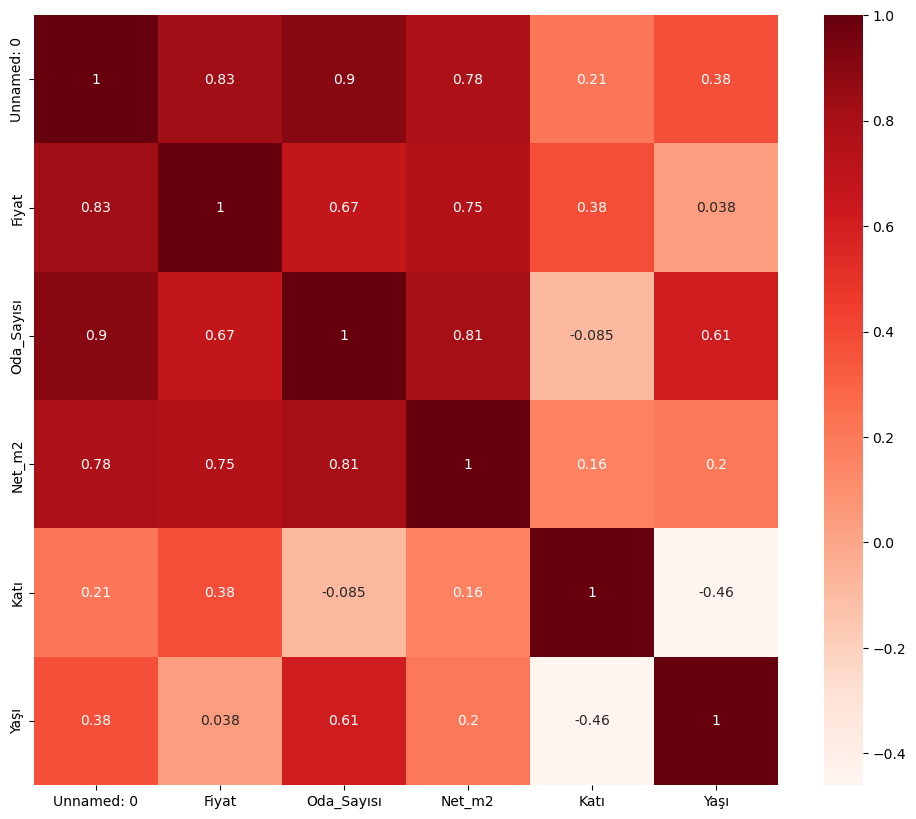

In [5]:
plt.figure(figsize=(12,10))
cor = veri.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [6]:
x = veri[['Oda_Sayısı', 'Net_m2', 'Katı', 'Yaşı']]
y = veri['Fiyat']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [9]:
model.intercept_
coef_df = pd.DataFrame(model.coef_,x.columns,columns=['Öznitelik Katsayıları'])
coef_df

,Öznitelik Katsayıları
Oda_Sayısı,118.350670
Net_m2,1.133092
Katı,7.096886
Yaşı,-4.665706


y = 305.24 + 118.35(Oda_sayısı)+1.13(Net_m2)+7.096(Katı)-4.66(Yaşı)

In [14]:
y_pred_train = model.predict(x_train)
for i, prediction in enumerate(y_pred_train):
    #print('Tahmin edilen ev fiyatı: TL%.2f, Gerçek fiyatı: TL %s', %(prediction, y[i]))
    print('Tahmin edilen ev fiyatı: %.2f, Gerçek fiyatı: %s' % (prediction, y[i]))


Tahmin edilen ev fiyatı: 551.96, Gerçek fiyatı: 475
Tahmin edilen ev fiyatı: 686.31, Gerçek fiyatı: 475
Tahmin edilen ev fiyatı: 531.30, Gerçek fiyatı: 450
Tahmin edilen ev fiyatı: 694.64, Gerçek fiyatı: 450
Tahmin edilen ev fiyatı: 675.66, Gerçek fiyatı: 475
Tahmin edilen ev fiyatı: 698.38, Gerçek fiyatı: 475
Tahmin edilen ev fiyatı: 558.29, Gerçek fiyatı: 475
Tahmin edilen ev fiyatı: 678.21, Gerçek fiyatı: 475
Tahmin edilen ev fiyatı: 546.29, Gerçek fiyatı: 450
Tahmin edilen ev fiyatı: 680.84, Gerçek fiyatı: 475
Tahmin edilen ev fiyatı: 845.06, Gerçek fiyatı: 475
Tahmin edilen ev fiyatı: 546.29, Gerçek fiyatı: 525
Tahmin edilen ev fiyatı: 746.94, Gerçek fiyatı: 550
Tahmin edilen ev fiyatı: 562.47, Gerçek fiyatı: 575
Tahmin edilen ev fiyatı: 553.19, Gerçek fiyatı: 550
Tahmin edilen ev fiyatı: 693.21, Gerçek fiyatı: 575
Tahmin edilen ev fiyatı: 533.30, Gerçek fiyatı: 500
Tahmin edilen ev fiyatı: 688.54, Gerçek fiyatı: 550
Tahmin edilen ev fiyatı: 668.88, Gerçek fiyatı: 525
Tahmin edile

In [15]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.733739961656849

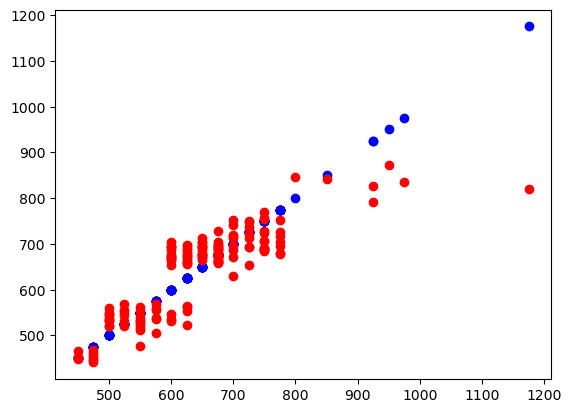

In [17]:
#plt.scatter(y_train, y_pred_train)
plt.scatter(y_train, y_train, color='blue', label='Gerçek Değerler')  # Actual values in blue
plt.scatter(y_train, y_pred_train, color='red', label='Tahmin Edilen Değerler')  # Predicted values in red


In [18]:
y_pred_test = model.predict(x_test)
for i, prediction in enumerate(y_pred_test):
    print('Tahmin edilen ev fiyatı: %.2f, Gerçek fiyatı: %s' % (prediction, y[i]))

Tahmin edilen ev fiyatı: 706.60, Gerçek fiyatı: 475
Tahmin edilen ev fiyatı: 654.37, Gerçek fiyatı: 475
Tahmin edilen ev fiyatı: 747.75, Gerçek fiyatı: 450
Tahmin edilen ev fiyatı: 692.29, Gerçek fiyatı: 450
Tahmin edilen ev fiyatı: 720.48, Gerçek fiyatı: 475
Tahmin edilen ev fiyatı: 537.57, Gerçek fiyatı: 475
Tahmin edilen ev fiyatı: 459.70, Gerçek fiyatı: 475
Tahmin edilen ev fiyatı: 521.32, Gerçek fiyatı: 475
Tahmin edilen ev fiyatı: 669.88, Gerçek fiyatı: 450
Tahmin edilen ev fiyatı: 686.31, Gerçek fiyatı: 475
Tahmin edilen ev fiyatı: 682.88, Gerçek fiyatı: 475
Tahmin edilen ev fiyatı: 720.79, Gerçek fiyatı: 525
Tahmin edilen ev fiyatı: 488.46, Gerçek fiyatı: 550
Tahmin edilen ev fiyatı: 725.65, Gerçek fiyatı: 575
Tahmin edilen ev fiyatı: 686.31, Gerçek fiyatı: 550
Tahmin edilen ev fiyatı: 781.01, Gerçek fiyatı: 575
Tahmin edilen ev fiyatı: 725.65, Gerçek fiyatı: 500
Tahmin edilen ev fiyatı: 696.95, Gerçek fiyatı: 550
Tahmin edilen ev fiyatı: 716.93, Gerçek fiyatı: 525
Tahmin edile

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.6987282352837991

In [22]:
Oda_sayısı = 3
Net_m2 = 230
Katı = 4
Yaşı = 28

print('Fiyatı: ', model.predict([[Oda_sayısı, Net_m2, Katı, Yaşı]]))

Fiyatı:  [818.57354156]


C:\Users\oz\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
